# Funciones de distribución de probabilidad

### Distribución Uniforme

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a= 1
b= 100
n= 1000000
data = np.random.uniform(a,b,n)

(array([100214., 100406.,  99702.,  99674.,  99900.,  99328., 100356.,
        100243., 100554.,  99623.]),
 array([ 1.00010863, 10.9000783 , 20.80004797, 30.70001764, 40.59998731,
        50.49995698, 60.39992666, 70.29989633, 80.199866  , 90.09983567,
        99.99980534]),
 <a list of 10 Patch objects>)

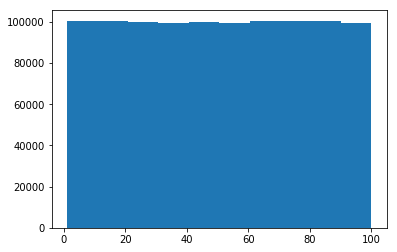

In [3]:
%matplotlib inline
plt.hist(data)

### Distribución Normal (Campana de Gauss)

In [4]:
data = np.random.randn(1000000)

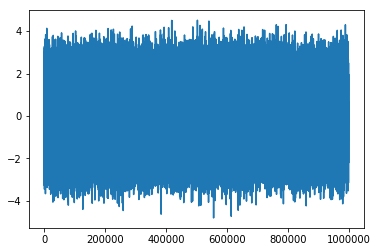

In [5]:
x= range(1, 1000001)
plt.plot(x, data)

(array([5.70000e+01, 1.52400e+03, 2.08000e+04, 1.18985e+05, 3.01401e+05,
        3.41323e+05, 1.72991e+05, 3.89920e+04, 3.74600e+03, 1.81000e+02]),
 array([-4.80189964, -3.8703864 , -2.93887317, -2.00735993, -1.0758467 ,
        -0.14433346,  0.78717977,  1.718693  ,  2.65020624,  3.58171947,
         4.51323271]),
 <a list of 10 Patch objects>)

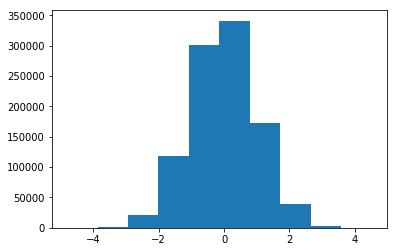

In [6]:
plt.hist(data)

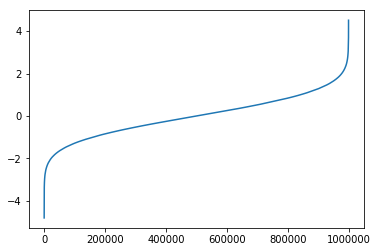

In [7]:
plt.plot(x, sorted(data))

(array([   7.,   80.,  427., 1353., 2520., 2827., 1880.,  719.,  170.,
          17.]),
 array([-4.19311679, -2.32547496, -0.45783312,  1.40980871,  3.27745054,
         5.14509238,  7.01273421,  8.88037605, 10.74801788, 12.61565971,
        14.48330155]),
 <a list of 10 Patch objects>)

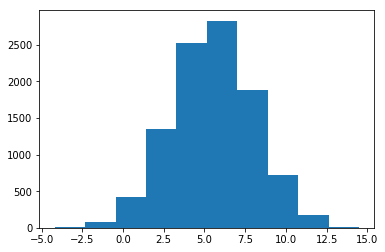

In [8]:
mu = 5.5 # media
sd = 2.5 # desviación estándar}
Z_1000 = np.random.randn(10000) # Dist. normal
data = mu + sd * Z_1000 # Z = (X - mu) / sd -> N(0,1), X = mu - sd * Z
plt.hist(data)

In [9]:
data = np.random.rand(2, 4) # Genera 2 colecciones con 4 elementos cada uno.
data

array([[0.21154668, 0.29517709, 0.65772976, 0.19418825],
       [0.21357799, 0.84621733, 0.38063639, 0.2443011 ]])

### Simulación de Monte Carlo

* Generamos 2 números aleatorios uniformes, x e y, entre 0 y 1. En total 1000 veces.
* Calculamos x² + Y²:
    * Si el valor es inferior a 1 -> estamos dentro del círculo
    * Si el valor es superior a 1 -> estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento un número suficiente de veces (por jemplo 100), para obener (100) diferentes aproximaciones de pi.
* Calculamos el promedio de los 1000 experimientos anteriores para dar un valor final de pi.

In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(100):
        value = n_exp
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    pi = pi_avg / n_exp
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

1.6098700000000001


(1.6098700000000001, [<matplotlib.lines.Line2D at 0x7f5e9a143358>])

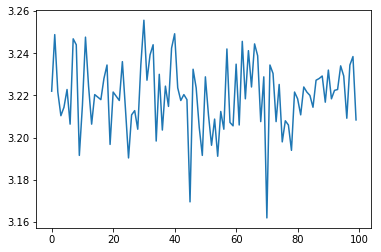

In [11]:
pi_montecarlo(10000, 200)

 ### Dummy Data sets

In [20]:
n = 1000000
data = pd.DataFrame(
    {
        'A': np.random.randn(n), # normal estándar 0,1
        'B': 1.5 + 2.5  * np.random.randn(n), # normal media 1.5 y desviación 2.5
        'C': np.random.uniform(5, 32, n) # uniforme entre 5 y 32
    }
)

In [22]:
data.head()

,A,B,C
0,-1.297550,-3.243611,27.925307
1,0.188688,-3.402977,8.142820
2,-0.180246,0.480267,29.444088
3,2.160777,-2.590822,22.754648
4,-2.924665,1.548139,31.497115


In [23]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000813,1.501285,18.499420
std,1.000173,2.498885,7.796808
min,-4.719969,-9.943466,5.000000
25%,-0.675359,-0.187687,11.750632
50%,0.000739,1.500974,18.501944
75%,0.676929,3.187542,25.252036
max,4.661527,13.212015,31.999894


(array([7.60000e+01, 2.10400e+03, 2.61510e+04, 1.38591e+05, 3.21166e+05,
        3.29620e+05, 1.50012e+05, 2.96700e+04, 2.50900e+03, 1.01000e+02]),
 array([-4.71996924, -3.78181962, -2.84367   , -1.90552038, -0.96737076,
        -0.02922114,  0.90892848,  1.8470781 ,  2.78522772,  3.72337734,
         4.66152696]),
 <a list of 10 Patch objects>)

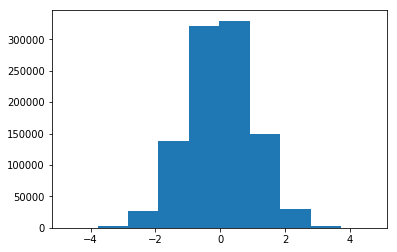

In [24]:
plt.hist(data["A"])

(array([1.30000e+02, 2.95600e+03, 3.26700e+04, 1.55883e+05, 3.29554e+05,
        3.15052e+05, 1.35322e+05, 2.61500e+04, 2.18700e+03, 9.60000e+01]),
 array([-9.9434661 , -7.62791796, -5.31236981, -2.99682167, -0.68127352,
         1.63427462,  3.94982276,  6.26537091,  8.58091905, 10.8964672 ,
        13.21201534]),
 <a list of 10 Patch objects>)

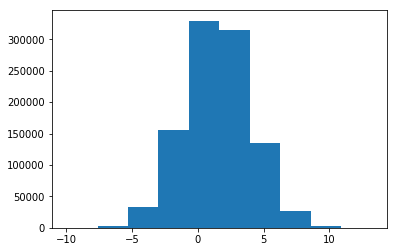

In [25]:
plt.hist(data["B"])

(array([100306., 100093.,  99319.,  99894., 100326., 100411.,  99658.,
         99706., 100163., 100124.]),
 array([ 5.00000035,  7.69998973, 10.39997912, 13.0999685 , 15.79995788,
        18.49994727, 21.19993665, 23.89992603, 26.59991542, 29.2999048 ,
        31.99989418]),
 <a list of 10 Patch objects>)

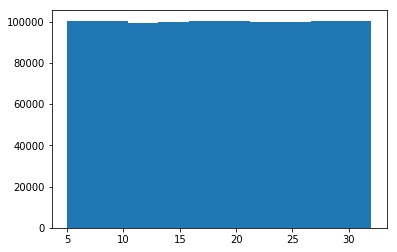

In [26]:
plt.hist(data["C"])

In [27]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [28]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [29]:
column_names = data.columns.values.tolist()

In [31]:
a = len(column_names)
a

21

In [33]:
new_data = pd.DataFrame(
    {
        'Column Name': column_names,
        'A': np.random.randn(a),
        'B': np.random.uniform(0,1,a)
    }
)

In [34]:
new_data

,Column Name,A,B
0,State,-2.271722,0.496839
1,Account Length,1.818584,0.590301
2,Area Code,0.108232,0.248400
3,Phone,0.686549,0.641311
4,Int'l Plan,-0.239353,0.235073
5,VMail Plan,1.392435,0.211998
6,VMail Message,0.515228,0.989471
7,Day Mins,0.019252,0.144752
8,Day Calls,2.385657,0.578703
9,Day Charge,0.177304,0.356086
